# SR-Dyna (Latent Learning Task)


In [131]:
import matplotlib.pyplot as plt
import numpy as np
import srdyna
import importlib

In [132]:
importlib.reload(srdyna)

<module 'srdyna' from '/Users/jeremygordon/repos/notebooks/sr-dyna-impl/srdyna.py'>

Loaded 10x10 world


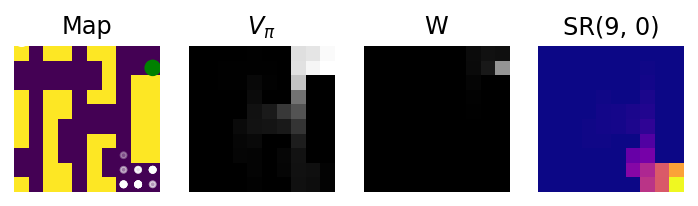

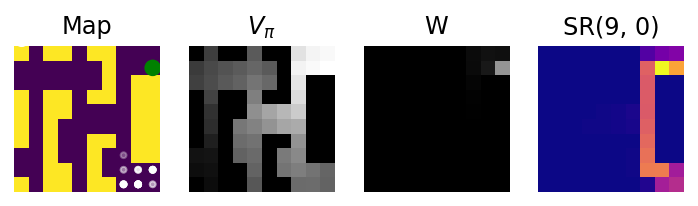

In [133]:
# Latent Learning
REPLAY = "sufficient"
EXPLORE_STEPS = 25000
POST_REWARD_STEPS = 20
REPLAY_STEPS = {
    "insufficient": 10,
    "sufficient": 10000
}[REPLAY]
env = srdyna.SimpleGridWorld(world='worlds/latent_learning.txt')
agent = srdyna.SRDyna(id=0, loc=(0, 2), env=env)

# Explore
for i in range(EXPLORE_STEPS):
    agent.step(random_policy=True)

# Add reward
R1_LOC = (9, 8)
env.reward_locs[R1_LOC] = 10

for i in range(POST_REWARD_STEPS):
    # Repeated one-step runs from R1
    agent.terminate_episode(reset_state=env.state_at_loc(R_LOC))
    agent.step(verbose=False)

fig, axs = plt.subplots(1, 4, dpi=144)
env.render(agent, ax=axs[0], last_k_steps=30)
agent.render_state_values(ax=axs[1], fig=fig)
agent.render_W(ax=axs[2], fig=fig)
agent.render_sr(9, ax=axs[3])
plt.show()

for i in range(REPLAY_STEPS):
    # One-step replay samples from random sa's
    from_sa = agent.random_experience_sa()
    experiences_from_sa = agent.weighted_experience_samples(k=1, from_sa=from_sa)
    agent.learn_offline(samples=experiences_from_sa)
    
fig, axs = plt.subplots(1, 4, dpi=144)
env.render(agent, ax=axs[0], last_k_steps=30)
agent.render_state_values(ax=axs[1], fig=fig)
agent.render_W(ax=axs[2], fig=fig)
agent.render_sr(9, ax=axs[3])
plt.show()

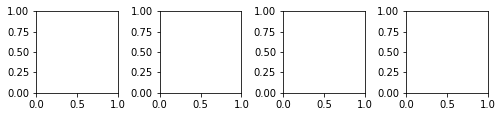

In [134]:
# Generate anim (slow)
agent.record_trials(title="latent_learning", 
                    start_locs=[(0, 2), (4, 0), (9, 0), (0, 8)])